In [1]:
import matplotlib.pyplot as plt
import numpy as np

from DQN_train import train_dqn
from DDQN_train import train_ddqn

In [2]:
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def plot_run(durations, returns, 
             method_name='DQN', env_name='CartPole'):

    plt.plot(smooth(durations, 10))
    plt.title(f'Episode durations per episode for {method_name} on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Time steps')
    plt.show()

    plt.plot(smooth(returns, 10))
    plt.title(f'Episode returns per episode for {method_name} on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Return (G)')
    plt.show()

def plot_compare(durations_1, returns_1, durations_2, returns_2, 
                 method1='DQN', method2='DDQN', env_name='CartPole'):
    plt.plot(smooth(durations_1, 10), label=method1)
    plt.plot(smooth(durations_2, 10), label=method2)
    plt.title(f'Episode durations per episode on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Time steps')
    plt.legend()
    plt.show()
    
    plt.plot(smooth(returns_1, 10), label=method1)
    plt.plot(smooth(returns_2, 10), label=method2)
    plt.title(f'Episode returns per episode on {env_name}')
    plt.xlabel('Episode')
    plt.ylabel('Return (G)')
    plt.legend()
    plt.show()

Episode 0 finished after 8 steps with return 4.161139200000001
Episode 10 finished after 11 steps with return 4.5705032704000015
Episode 20 finished after 11 steps with return 4.5705032704000015
Episode 30 finished after 10 steps with return 4.463129088000001
Episode 40 finished after 10 steps with return 4.463129088000001
Episode 50 finished after 10 steps with return 4.463129088000001
Episode 60 finished after 30 steps with return 4.993810299803576
Episode 70 finished after 29 steps with return 4.992262874754469
Episode 80 finished after 31 steps with return 4.995048239842861
Episode 90 finished after 44 steps with return 4.999727774106465
Episode 100 finished after 40 steps with return 4.99933538600211
Episode 110 finished after 75 steps with return 4.9999997304005355
Episode 120 finished after 68 steps with return 4.999998714449567
Episode 130 finished after 86 steps with return 4.999999976841584
Episode 140 finished after 147 steps with return 4.999999999999974
Episode 150 finishe

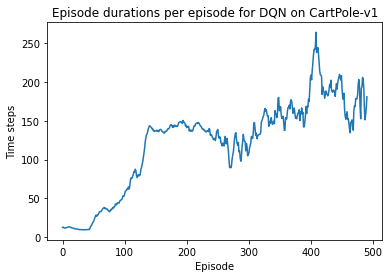

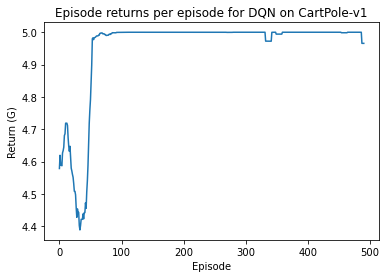

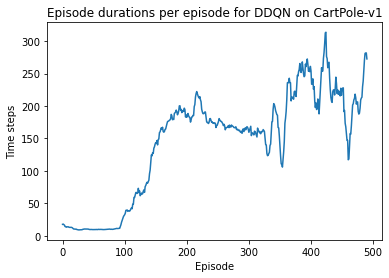

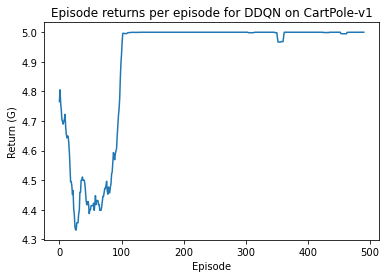

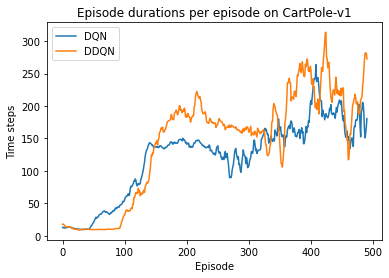

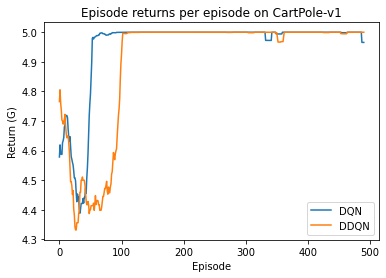

In [7]:
env_name = 'CartPole-v1'

n_episodes = 500
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 400
mem_cap = 10000
seed = 42

dqn_durations_cp, dqn_returns_cp = train_dqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                       eps_start, eps_end, eps_decay_iters, mem_cap, seed)

ddqn_durations_cp, ddqn_returns_cp = train_ddqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma,
                                          eps_start, eps_end, eps_decay_iters, mem_cap, seed)

plot_run(dqn_durations_cp, dqn_returns_cp, method_name='DQN', env_name=env_name)
plot_run(ddqn_durations_cp, ddqn_returns_cp, method_name='DDQN', env_name=env_name)
plot_compare(dqn_durations_cp, dqn_returns_cp, ddqn_durations_cp, ddqn_returns_cp, env_name=env_name)

Episode 0 finished after 200 steps with return -5.000000000000001
Episode 10 finished after 200 steps with return -5.000000000000001
Episode 20 finished after 200 steps with return -5.000000000000001
Episode 30 finished after 200 steps with return -5.000000000000001
Episode 40 finished after 200 steps with return -5.000000000000001
Episode 50 finished after 200 steps with return -5.000000000000001
Episode 60 finished after 200 steps with return -5.000000000000001
Episode 70 finished after 200 steps with return -5.000000000000001
Episode 80 finished after 200 steps with return -5.000000000000001
Episode 90 finished after 200 steps with return -5.000000000000001
Episode 100 finished after 200 steps with return -5.000000000000001
Episode 110 finished after 200 steps with return -5.000000000000001
Episode 120 finished after 200 steps with return -5.000000000000001
Episode 130 finished after 200 steps with return -5.000000000000001
Episode 140 finished after 200 steps with return -5.0000000

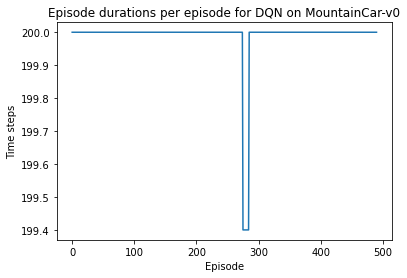

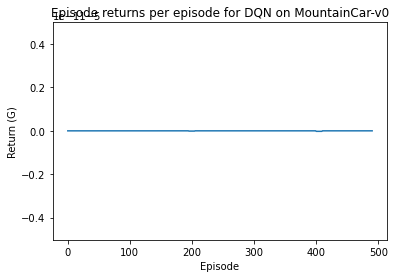

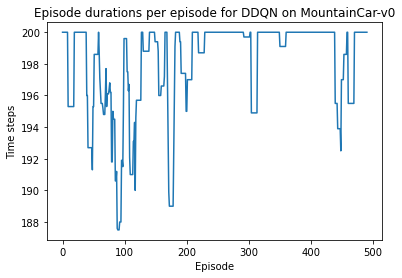

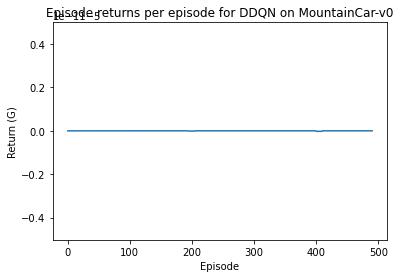

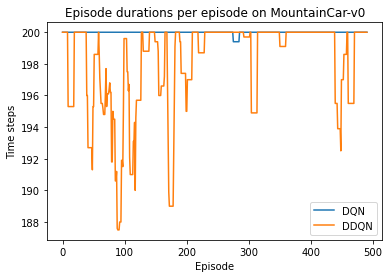

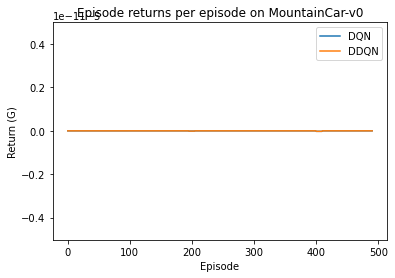

In [8]:
env_name = 'MountainCar-v0'

n_episodes = 500
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 400
mem_cap = 10000
seed = 42

dqn_durations_mc, dqn_returns_mc = train_dqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                       eps_start, eps_end, eps_decay_iters, mem_cap, seed)
ddqn_durations_mc, ddqn_returns_mc = train_ddqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma,
                                          eps_start, eps_end, eps_decay_iters, mem_cap, seed)

plot_run(dqn_durations_mc, dqn_returns_mc, method_name='DQN', env_name=env_name)
plot_run(ddqn_durations_mc, ddqn_returns_mc, method_name='DDQN', env_name=env_name)
plot_compare(dqn_durations_mc, dqn_returns_mc, ddqn_durations_mc, ddqn_returns_mc, env_name=env_name)

Episode 0 finished after 500 steps with return -5.000000000000001
Episode 10 finished after 255 steps with return -5.000000000000001
Episode 20 finished after 500 steps with return -5.000000000000001
Episode 30 finished after 282 steps with return -5.000000000000001
Episode 40 finished after 132 steps with return -4.999999999998995
Episode 50 finished after 181 steps with return -5.000000000000001
Episode 60 finished after 241 steps with return -5.000000000000001
Episode 70 finished after 234 steps with return -5.000000000000001
Episode 80 finished after 249 steps with return -5.000000000000001
Episode 90 finished after 291 steps with return -5.000000000000001
Episode 100 finished after 250 steps with return -5.000000000000001
Episode 110 finished after 144 steps with return -4.999999999999933
Episode 120 finished after 461 steps with return -5.000000000000001
Episode 130 finished after 500 steps with return -5.000000000000001
Episode 140 finished after 431 steps with return -5.0000000

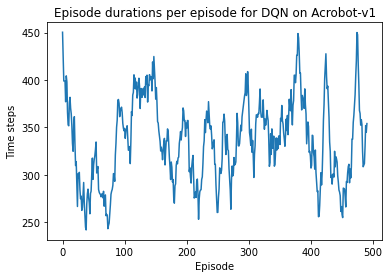

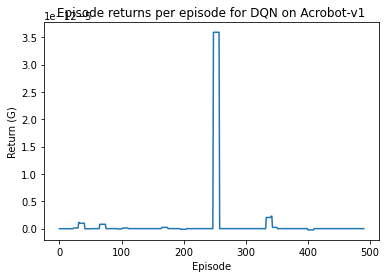

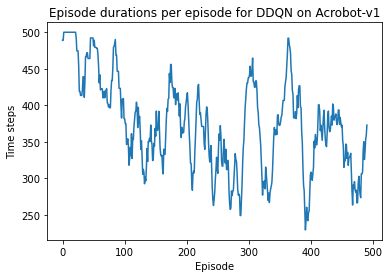

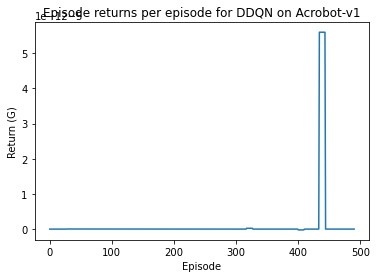

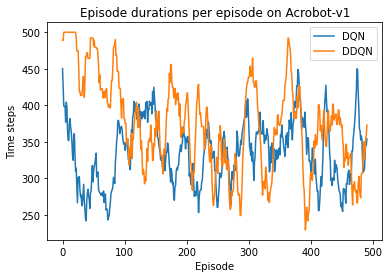

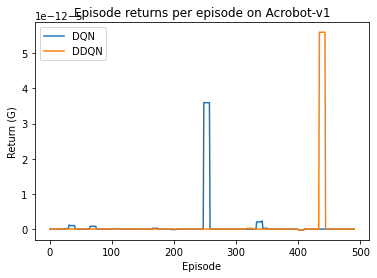

In [9]:
env_name = 'Acrobot-v1'

n_episodes = 500
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 400
mem_cap = 10000
seed = 42

dqn_durations_acro, dqn_returns_acro = train_dqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                       eps_start, eps_end, eps_decay_iters, mem_cap, seed)
ddqn_durations_acro, ddqn_returns_acro = train_ddqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma,
                                          eps_start, eps_end, eps_decay_iters, mem_cap, seed)

plot_run(dqn_durations_acro, dqn_returns_acro, method_name='DQN', env_name=env_name)
plot_run(ddqn_durations_acro, ddqn_returns_acro, method_name='DDQN', env_name=env_name)
plot_compare(dqn_durations_acro, dqn_returns_acro, ddqn_durations_acro, ddqn_returns_acro, env_name=env_name)

Episode 0 finished after 246 steps with return -5.000000000000001
Episode 10 finished after 1063 steps with return -5.000000000000001
Episode 20 finished after 262 steps with return -5.000000000000001
Episode 30 finished after 15 steps with return -4.824078139555841
Episode 40 finished after 98 steps with return -4.999999998408568
Episode 50 finished after 78 steps with return -4.999999861965075
Episode 60 finished after 11 steps with return -4.5705032704000015
Episode 70 finished after 126 steps with return -4.999999999996924
Episode 80 finished after 120 steps with return -4.999999999988261
Episode 90 finished after 439 steps with return -5.000000000000001
Episode 100 finished after 32 steps with return -4.99603859187429
Episode 110 finished after 4 steps with return -2.9520000000000004
Episode 120 finished after 3 steps with return -2.4400000000000004
Episode 130 finished after 169 steps with return -5.000000000000001
Episode 140 finished after 24 steps with return -4.97638816758565

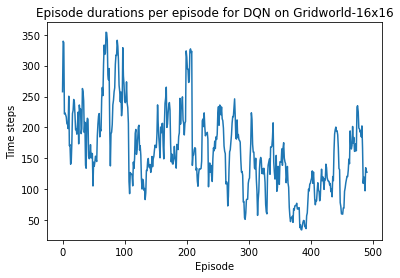

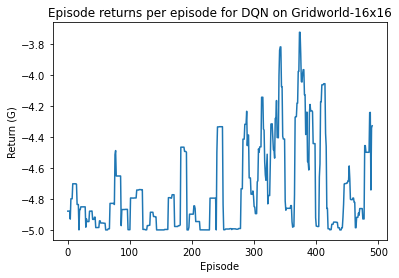

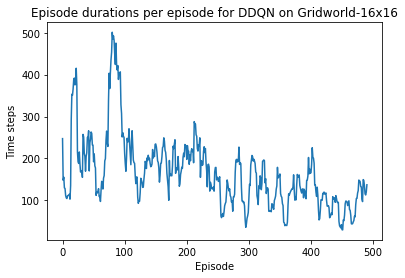

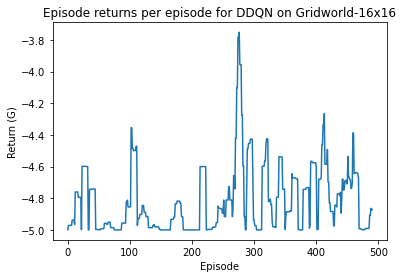

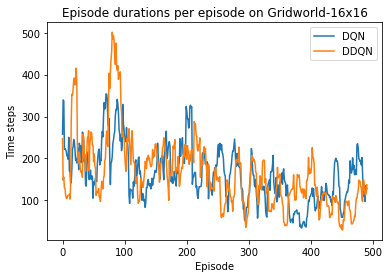

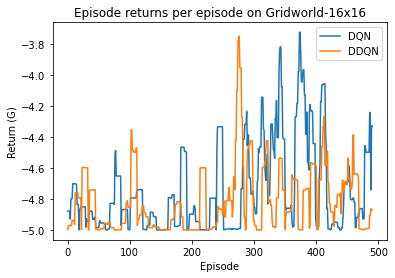

In [10]:
env_name = 'Gridworld-16x16'

n_episodes = 500
batch_size = 64
hidden_dim = 128
lr = 1e-3
gamma = 0.8
eps_start = 1.0
eps_end = 0.05
eps_decay_iters = 400
mem_cap = 10000
seed = 42

dqn_durations_gw, dqn_returns_gw = train_dqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma, 
                                       eps_start, eps_end, eps_decay_iters, mem_cap, seed)
ddqn_durations_gw, ddqn_returns_gw = train_ddqn(env_name, n_episodes, batch_size, hidden_dim, lr, gamma,
                                          eps_start, eps_end, eps_decay_iters, mem_cap, seed)

plot_run(dqn_durations_gw, dqn_returns_gw, method_name='DQN', env_name=env_name)
plot_run(ddqn_durations_gw, ddqn_returns_gw, method_name='DDQN', env_name=env_name)
plot_compare(dqn_durations_gw, dqn_returns_gw, ddqn_durations_gw, ddqn_returns_gw, env_name=env_name)